<a href="https://colab.research.google.com/github/testgithubrit11189/nity444/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <<======== Web Scraping Mini Project =========>>


# Scraping Github Topics Info:

- Topic Name
- Topic description
- Topic URL:


In [ ]:
import requests #  First import requests library to send the request to the server.

### requests library has a function named "get" to send the request and save it to the variable web_page.

In [ ]:
topic_url = 'https://github.com/topics'
web_page = requests.get(topic_url)

### Check the status_code:

  - 200 -> successful
  - 403 -> failed

In [ ]:
web_page.status_code

200

In [ ]:
len(web_page.content)

200862

### Now import BeauifulSoup to scrape and parse the html code from the request variable.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(web_page.content,'html.parser') # Object of Beautiful Soup.

# Image that contain a rough idea from where the Info is being Scraped.

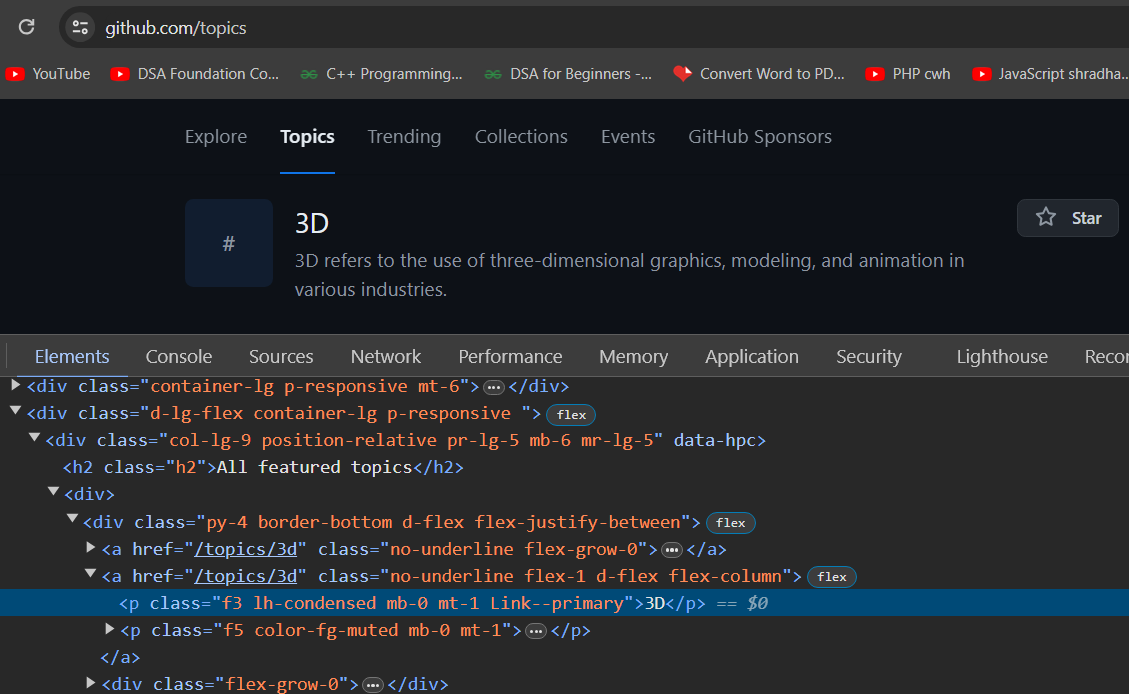

In [ ]:
title_tag = soup.find_all('p',class_ = 'f3 lh-condensed mb-0 mt-1 Link--primary')

In [ ]:
title_tag[0].text

'3D'

### Scrape the description tag which are the p tags of the specific class.

In [ ]:
decs_tag = soup.find_all('p',class_ ='f5 color-fg-muted mb-0 mt-1')

In [ ]:
decs_tag[0].text.strip()

'3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.'

### Scrape the links tag which are the a tags with the specific class.

In [ ]:
link_tag = soup.find_all('a',class_ = 'no-underline flex-1 d-flex flex-column')

In [ ]:
'https://github.com' + link_tag[0]['href']

'https://github.com/topics/3d'

Iterating title_tags

In [ ]:
title_list = []
for i in title_tag:
  title_list.append(i.text)
print(title_list)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command-line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'C++', 'Cryptocurrency', 'Crystal']


Iterating decs_tags

In [ ]:
decs_list = []
for i in decs_tag:
  decs_list.append(i.text.strip())
print(decs_list)

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.', 'Ajax is a technique for creating interactive web applications.', 'Algorithms are self-contained sequences that carry out a variety of tasks.', 'Amp is a non-blocking concurrency library for PHP.', 'Android is an operating system built by Google designed for mobile devices.', 'Angular is an open source web application platform.', 'Ansible is a simple and powerful automation engine.', 'An API (Application Programming Interface) is a collection of protocols and subroutines for building software.', 'Arduino is an open source platform for building electronic devices.', 'ASP.NET is a web framework for building modern web apps and services.', 'An awesome list is a list of awesome things curated by the community.', 'Amazon Web Services provides on-demand cloud computing platforms on a subscription basis.', 'Azure is a cloud computing service created by Microsoft.', 'Babel is a compiler for w

Iterating link_tags

In [ ]:
link_list = []
for i in link_tag:
  link_list.append('https://github.com'+i['href'])
print(link_list)

['https://github.com/topics/3d', 'https://github.com/topics/ajax', 'https://github.com/topics/algorithm', 'https://github.com/topics/amphp', 'https://github.com/topics/android', 'https://github.com/topics/angular', 'https://github.com/topics/ansible', 'https://github.com/topics/api', 'https://github.com/topics/arduino', 'https://github.com/topics/aspnet', 'https://github.com/topics/awesome', 'https://github.com/topics/aws', 'https://github.com/topics/azure', 'https://github.com/topics/babel', 'https://github.com/topics/bash', 'https://github.com/topics/bitcoin', 'https://github.com/topics/bootstrap', 'https://github.com/topics/bot', 'https://github.com/topics/c', 'https://github.com/topics/chrome', 'https://github.com/topics/chrome-extension', 'https://github.com/topics/cli', 'https://github.com/topics/clojure', 'https://github.com/topics/code-quality', 'https://github.com/topics/code-review', 'https://github.com/topics/compiler', 'https://github.com/topics/continuous-integration', 'ht

### Dictionary:
  - All the three lists added to a dictionary as:
    - topic_name
    - description
    - links

In [ ]:
data_dict = {
    'topic_name' : title_list,
    'description' : decs_list,
    'links' : link_list
}

In [ ]:
import pandas as pd

Dictionary to DataFrame Using pandas

In [ ]:
Scraped_data = pd.DataFrame(data_dict)

In [ ]:
Scraped_data.shape

(30, 3)

In [ ]:
Scraped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   topic_name   30 non-null     object
 1   description  30 non-null     object
 2   links        30 non-null     object
dtypes: object(3)
memory usage: 848.0+ bytes


In [ ]:
Scraped_data.head(10)

,topic_name,description,links
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source platform for buildin...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


### Save the DataFrame as a csv file

In [ ]:
Scraped_data.to_csv('github-topics-data.csv')